<a href="https://colab.research.google.com/github/claudiaesnarrizaga/APRENDIZAJE_AUTOMATICO_23_24/blob/main/Pr%C3%A1ctica_4_Algoritmo_Gen%C3%A9tico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 4 - Algoritmo Genético**
**Grupo:** B03

**Integrantes:** Celia Díaz, Jaime Martínez, Claudia Esnarrizaga

**Profesor:** Carlos Emilio Rabazo

**Curso:** 3ºB Ingeniería Matemática


## **Enunciado**

1. Encontrar los máximos de la función "picos"

  $$\ z=f(x,y) = 3(1-x)^2e^{-(x^2)-(y+1)^2}-10(x/5-x^3-y^5)e^{-x^2-y^2}-1/3e^{-(x+1)^2-y^2}$$

  En el dominio    

$$\{x,y\} \in [−100,100] $$

2. Dada la **Función de Rastringin**, con
$$A = 10$$
$$\{x_i\} \in [-5.12,5.12] $$
Implementa dicha función en Python y minimízala para n = 10.

  Compara el funcionamiento del Algoritmo Genético para cruce con un punto con cruce con dos puntos en ambos problemas.

## **Resolución 1**


### **Carga de paquetes y librerías**

In [1]:
!pip install deap
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install scoop

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scoop: filename=scoop-0.7.2.0-py3-none-any.whl size=78113 sha256=93b2cd5a3002b48027dfb92edebbdab4da63bbd89d7dd366523edebd4d8c7d01
  Stored in directory: /root/.cache/pip/wheels/26/c6/da/088e4bffcfbc33fa40644ca636267bc801c8fd9eef973483db
Successfully built scoop


Instalamos los paquetes esenciales que son requeridos por el código posterior que utilizará algoritmos evolutivos y herramientas de visualización en Python.



*   `!pip install deap`: Instala el paquete DEAP, que es un framework para la implementación de algoritmos evolutivos en Python. DEAP proporciona herramientas flexibles y extensibles para diseñar y experimentar con algoritmos evolutivos.
*   `!pip install matplotlib`: Instala el paquete Matplotlib, que es una biblioteca de visualización en 2D para Python. Matplotlib se utiliza comúnmente para crear gráficos y visualizaciones de datos.
*   `!pip install numpy`: Instala el paquete NumPy, que es una biblioteca fundamental para computación numérica en Python. NumPy proporciona estructuras de datos eficientes para manipulación de matrices y operaciones matemáticas.
*   `!pip install scipy`: Instala el paquete SciPy, que es una biblioteca de software científico para Python. SciPy proporciona funcionalidades adicionales para optimización, álgebra lineal, integración, interpolación, funciones especiales, y más.
*   `!pip install scoop`: Instala el paquete Scoop, que es una biblioteca para el paralelismo de bucles en Python. Scoop facilita la escritura de código paralelo al permitir la paralelización de bucles mediante la sencilla adición de una función decoradora.

In [2]:
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import random

### **Generación de Números Pseudo-aleatorios para 'x' e 'y'**


In [3]:
# Fijamos la semilla
np.random.seed(0)
# Generamos los números pseudo-aleatorios
x = np.random.uniform(-100, 100, 10).reshape(1, 10)
y = np.random.uniform(-100, 100, 10).reshape(1, 10)
print('x= ', x)
print('y= ', y)

x=  [[  9.76270079  43.03787327  20.55267521   8.9766366  -15.26904013
   29.17882261 -12.48255775  78.35460016  92.7325521  -23.31169623]]
y=  [[ 58.34500762   5.77898395  13.60891222  85.11932766 -85.79278836
  -82.57414006 -95.95632051  66.52396911  55.63135019  74.00242965]]


Fijamos la semilla del generador de números aleatorios de NumPy en 0, lo cual nos asegura que los números aleatorios generados sean los mismos cada vez que se ejecute el código. Esto se hace para obtener los mismos resultados cada vez que se ejecuta el código.

Este fragmento de código tiene como propósito generar dos vectores, 'x' e 'y', cada uno con 10 números pseudo-aleatorios uniformemente distribuidos en el rango de -100 a 100. Luego, utilizamos reshape para organizar estos números en una matriz de 1 fila y 10 columnas.

### **Definición de la función objetivo**

In [4]:
def funcion_prueba(x):
    # x es x[0] e y es x[1]
    funcion_picos = 3*(1-x[0])**2*np.exp(-1*(x[0]**2)-(x[1]+1)**2)-10*(x[0]/5-x[0]**3-x[1]**5)*np.exp(-1*(x[0]**2)-x[1]**2)-1/3*np.exp(-1*(x[0]+1)**2-x[1]**2)
    return funcion_picos

In [5]:
x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)
print('x= ', x)
print('y= ', y)

x=  [-100.          -99.7997998   -99.5995996   -99.3993994   -99.1991992
  -98.998999    -98.7987988   -98.5985986   -98.3983984   -98.1981982
  -97.997998    -97.7977978   -97.5975976   -97.3973974   -97.1971972
  -96.996997    -96.7967968   -96.5965966   -96.3963964   -96.1961962
  -95.995996    -95.7957958   -95.5955956   -95.3953954   -95.1951952
  -94.99499499  -94.79479479  -94.59459459  -94.39439439  -94.19419419
  -93.99399399  -93.79379379  -93.59359359  -93.39339339  -93.19319319
  -92.99299299  -92.79279279  -92.59259259  -92.39239239  -92.19219219
  -91.99199199  -91.79179179  -91.59159159  -91.39139139  -91.19119119
  -90.99099099  -90.79079079  -90.59059059  -90.39039039  -90.19019019
  -89.98998999  -89.78978979  -89.58958959  -89.38938939  -89.18918919
  -88.98898899  -88.78878879  -88.58858859  -88.38838839  -88.18818819
  -87.98798799  -87.78778779  -87.58758759  -87.38738739  -87.18718719
  -86.98698699  -86.78678679  -86.58658659  -86.38638639  -86.18618619
  -85.9

Utilizamos la función np.linspace de NumPy para generar dos vectores, 'x' e 'y', que contienen 1000 puntos cada uno, igualmente espaciados en el rango de -100 a 100.

In [6]:
# Evaluamos todos los valores de las variables
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([funcion_prueba(val) for val in vals],(1000, 1000))

Realizamos la evaluación de una función sobre una malla bidimensional de puntos en el plano *x* e *y*. Evaluamos nuestra función (funcion_picos) en cada punto de esa cuadrícula, y almacenamos los resultados en una matriz bidimensional 'fx'.

Text(0.5, 0, 'f(x,y)')

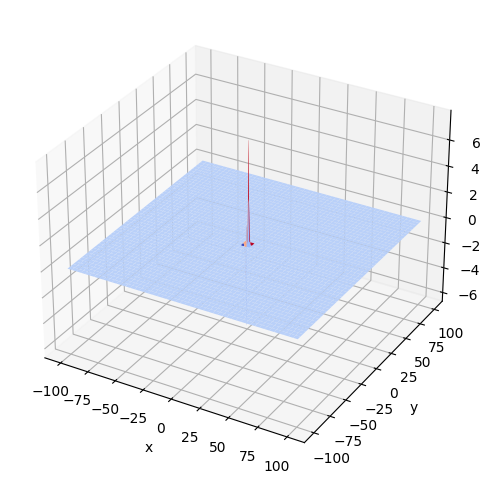

In [7]:
# Representamos los resultados obtenidos
figure_3d = plt.figure(figsize=(8,6))
ax = figure_3d.add_subplot(111, projection="3d")
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

Creamos una visualización tridimensional de la función evaluada sobre la cuadrícula bidimensional. La superficie tridimensional representa la variación de la función en función de las variables 'x' e 'y'.

*   `figure_3d = plt.figure(figsize=(8,6))`: Crea una nueva figura tridimensional con un tamaño de 8x6 pulgadas. `plt.figure()` se utiliza para crear una nueva figura de Matplotlib.
*   `ax = figure_3d.add_subplot(111, projection="3d")`: Agrega un subplot tridimensional a la figura. La especificación (111) significa que se trata de un subplot único en una cuadrícula de 1x1 (es decir, una figura única), y `projection="3d"` indica que será un subplot tridimensional.
* `ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)`: Plotea la superficie tridimensional utilizando los valores de 'x_ax', 'y_ax', y 'fx'. El argumento `cmap=cm.coolwarm` especifica el mapa de colores que se utilizará para representar la altura de la superficie.
* `ax.set_xlabel("x"), ax.set_ylabel("y"), ax.set_zlabel("f(x,y)")`: Establece las etiquetas de los ejes x, y, y z respectivamente.

### **Definición del problema y generación de la población inicial**

#### **Creación del problema**

In [8]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

Establecemos la estructura básica de la función de aptitud para un problema de maximización en DEAP. Posteriormente, esta función de aptitud la utilizaremos para evaluar cómo de bueno es cada individuo en un algoritmo evolutivo.

* `creator`: Es un módulo en DEAP que se utiliza para crear clases que representan a individuos y funciones de aptitud.

* `create("FitnessMax", base.Fitness, weights=(1.0,))`: Esta línea crea una nueva clase llamada `FitnessMax` utilizando creator. La clase se define como una subclase de `base.Fitness` en DEAP, y se especifica que es un problema de maximización (`FitnessMax` indica que estamos maximizando). El argumento `weights=(1.0,)` especifica los pesos de los objetivos de la función de aptitud. En este caso, hay un solo objetivo con un peso de 1.0, indicando que estamos tratando de maximizar un solo objetivo.

#### **Creación de la plantilla del individuo**

In [9]:
creator.create("Individual", list, fitness=creator.FitnessMax)

Definimos una nueva clase llamada "Individual" que representa a los individuos en un algoritmo evolutivo. Los individuos serán tratados como listas de genes, y cada individuo tendrá un atributo llamado `fitness` que representará la función de aptitud. La función de aptitud la configuramos para ser de tipo `FitnessMax`, lo que indica que el objetivo es maximizar el valor de la función de aptitud.

* `creator.create("Individual", list, fitness=creator.FitnessMax)`: Utiliza la función create del módulo creator de DEAP para crear una nueva clase llamada "Individual".
* `"Individual"`: Es el nombre de la nueva clase que estamos creando.
* `list`: Especifica que la clase "Individual" heredará de la clase list. Esto significa que un individuo será tratado como una lista de genes.
* `fitness=creator.FitnessMax`: Indica que la clase "Individual" tendrá un atributo llamado fitness que representará la función de aptitud del individuo. Además, se establece que la función de aptitud es de tipo FitnessMax, lo que significa que estamos tratando de maximizar el valor de la función de aptitud.

#### **Creación de individuos aleatorios y población inicial**

Tenemos que implementar el Algoritmo Genético con un punto de cruce y con dos puntos de cruce, entonces tenemos que crear dos `Toolbox` (objeto caja de herramientas).

In [10]:
toolbox1 = base.Toolbox()
toolbox2 = base.Toolbox()

Creamos dos instancias de Toolbox, toolbox1 y toolbox2, que utilizaremos para configurar y organizar las operaciones genéticas y los componentes específicos de un algoritmo evolutivo. Cada Toolbox se puede personalizar para contener las operaciones y configuraciones específicas necesarias para resolver un problema particular mediante un algoritmo evolutivo.

* `toolbox1 = base.Toolbox()`: Crea una instancia del objeto Toolbox llamada
toolbox1. El objeto Toolbox es proporcionado por DEAP y se utiliza para registrar operadores genéticos y otros componentes necesarios para la ejecución de algoritmos evolutivos.

* `toolbox2 = base.Toolbox()`: Similar a la anterior, crea otra instancia del objeto Toolbox llamada toolbox2. Cada instancia del Toolbox es independiente y puede configurarse con sus propios operadores y configuraciones.


In [11]:
# Generación de genes Prueba
toolbox1.register("attr_uniform", random.uniform, -100, 100)
# Generación de genes Prueba
toolbox2.register("attr_uniform", random.uniform, -100, 100)

Estas funciones attr_uniform generan valores aleatorios para los genes (variables) de los individuos en el rango especificado.

`toolbox.register("attr_uniform", random.uniform, -100, 100)`: En toolbox1, se registra la función `random.uniform` con el nombre simbólico "attr_uniform". Esto significa que ahora, cuando nos refiramos a "attr_uniform" en el contexto de toolbox1 y toolbox2, estaremos haciendo referencia a la función `random.uniform`. La función random.uniform generará números pseudoaleatorios uniformemente distribuidos en el rango de -100 a 100. En otras palabras, "attr_uniform" se convierte en una función de generación de genes para toolbox1 y toolbox2.

In [12]:
# Probamos y vemos que generamos un número leatorio entre -100 y 100 distinto cada vez
toolbox1.attr_uniform()

44.04993571569841

In [13]:
toolbox2.attr_uniform()

-57.181251593435874

In [14]:
# Generación de inviduos
toolbox1.register("individual", tools.initRepeat, creator.Individual,
                 toolbox1.attr_uniform, 2)
toolbox2.register("individual", tools.initRepeat, creator.Individual,
                 toolbox1.attr_uniform, 2)

Definimos cómo se crearán los individuos en el contexto de dos instancias diferentes de Toolbox. Cada instancia tiene su propia función de generación de genes, pero ambas utilizan la misma clase `creator.Individual` para representar a los individuos. Analizamos el código para toolbox1 pero se aplica lo mismo para toolbox2:

`toolbox1.register("individual", tools.initRepeat, creator.Individual, toolbox1.attr_uniform, 2)`: En toolbox1, se registra la creación de individuos con el nombre simbólico "individual". Esto significa que ahora, cuando nos refiramos a "individual" en el contexto de toolbox1, estaremos hablando de la creación de individuos según la función tools.initRepeat.

* `tools.initRepeat`: Es una función proporcionada por DEAP que inicializa un individuo repitiendo la función proporcionada. En este caso, la función proporcionada es `toolbox1.attr_uniform`, que es la función de generación de genes registrada anteriormente.

* `creator.Individual`: Es la clase que representa a los individuos en el contexto de DEAP. Fue creada anteriormente con `creator.create("Individual", list, fitness=creator.FitnessMax)`.

* `toolbox1.attr_uniform`: Indica que la función `attr_uniform` registrada en toolbox1 se utilizará para generar genes en los individuos.

* `2`: Es el número de genes que tendrá cada individuo.


In [15]:
# Ejemplo de la generación de un individuo aleatorio
individuo1 = toolbox1.individual()
individuo2 = toolbox2.individual()

Generamos dos individuos aleatorios utilizando las configuraciones definidas en las cajas de herramientas toolbox1 y toolbox2.

In [16]:
# Recordar que individuo es una lista que tiene un atributo fitness
# donde se almacena la calidad del mismo, que al principio será
# vacío, porque aun no ha sido evaluado
individuo1.fitness.values
individuo2.fitness.values

()

Almacenamos la calidad del individuo. Inicialmente, este atributo está vacío ya que los individuos aún no han sido evaluados.

In [17]:
# Generación de población
toolbox1.register("population", tools.initRepeat, list,
                 toolbox1.individual, 32)
toolbox2.register("population", tools.initRepeat, list,
                 toolbox2.individual, 32)

* `toolbox1.register("population", tools.initRepeat, list, toolbox1.individual, 100)` y `toolbox2.register("population", tools.initRepeat, list, toolbox2.individual, 100)` registran la creación de una población de 100 individuos para cada toolbox.

* `tools.initRepeat` inicializa una población repitiendo la función `toolbox1.individual` (o `toolbox2.individual`) para generar individuos aleatorios.

In [18]:
# Ejemplo de creación de una población. Se ve que es
# una lista de 32 listas para cada población (una por cada individuo)
poblacion1 = toolbox1.population()
poblacion2 = toolbox2.population()

Generamos dos poblaciones aleatorias utilizando las configuraciones definidas en las cajas de herramientas toolbox1 y toolbox2.

In [19]:
# Cada individuo tiene 2 componentes
poblacion1[0]
poblacion2[0]

[-86.92497801773192, -91.80862008288268]

In [20]:
poblacion1[0].fitness.values
poblacion2[0].fitness.values

()

### **Función objetivo y operadores genéticos**

#### **Función objetivo**

Ahora crearemos nuestra **función objetivo** y la **registraremos** en nuestro `Toolbox`

In [21]:
def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(x)):
        if x[i] > 100 or x[i] < -100:
            return -1,
    funcion_picos = 3*(1-x[0])**2*np.exp(-(x[0]**2)-(x[1]+1)**2)-10*(x[0]/5-x[0]**3-x[1]**5)*np.exp(-x[0]**2-x[1]**2)-1/3*np.exp(-(x[0]+1)**2-x[1]**2)
    return funcion_picos,

La función llamada `funcion_objetivo` en Python acepta una lista de valores x. Primero, verifica si algún valor en la lista excede los límites de ±100, devolviendo -1 si es el caso. Luego, calcula un valor complicado denominado `funcion_picos` utilizando operaciones matemáticas y funciones exponenciales. Finalmente, retorna este valor en forma de tupla.

In [22]:
toolbox1.register("evaluate", funcion_objetivo)
toolbox2.register("evaluate", funcion_objetivo)

Configuramos las funciones de evaluación para ser utilizadas en el contexto de algoritmos evolutivos, esencial para la optimización posterior.

In [23]:
# Ejemplo de uso 1
funcion_objetivo(individuo1)

(0.0,)

In [24]:
# Ejemplo de uso 2
toolbox1.evaluate(individuo1)

(0.0,)

### **Incorporar los operadores genéticos**

#### **Cruce**

In [25]:
# Registro de operacion genética de Cruce en un Punto
toolbox1.register("mate", tools.cxOnePoint)
# Registro de operacion genética de Cruce en dos Puntos
toolbox2.register("mate", tools.cxTwoPoint)

Vamos a utilizar la *Operación de Cruce en un Punto (One-Point Crossover)*

* **Objetivo**: La operación de cruce tiene como objetivo combinar información genética de dos individuos (soluciones) para generar descendencia.
* **Implementación registrada**: La función `tools.cxOnePoint` es proporcionada por la biblioteca DEAP (Distributed Evolutionary Algorithms in Python) y representa la implementación del cruce en un punto. Este método toma dos individuos como entrada y realiza el cruce en un único punto de sus representaciones genéticas.

#### **Mutación**

In [26]:
toolbox1.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)
toolbox2.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)

Vamos a utilizar la *Operación de Mutación Gaussiana*:

* **Objetivo**: La operación de mutación tiene como objetivo introducir variabilidad genética en un individuo, alterando sus características genéticas de manera aleatoria.
* **Implementación registrada**: La función `tools.mutGaussian` es una implementación de mutación gaussiana proporcionada por la biblioteca DEAP. En este caso, la mutación gaussiana añade ruido gaussiano a los valores genéticos del individuo. Los parámetros específicos de la mutación están configurados con `mu=0` (media de la distribución gaussiana), `sigma=5` (desviación estándar de la distribución gaussiana), e `indpb=0.1` (probabilidad de mutación para cada valor genético).

#### **Selección**

In [27]:
toolbox1.register("select", tools.selTournament, tournsize=3)
toolbox2.register("select", tools.selTournament, tournsize=3)

Utilizaremos la *Operación de Selección por Torneo*:

* **Objetivo**: La operación de selección es responsable de elegir individuos para reproducirse en función de su aptitud. El método de selección por torneo elige aleatoriamente varios individuos y selecciona el mejor de ellos para la reproducción.
* **Implementación registrada**: La función `tools.selTournament` es una implementación de selección por torneo proporcionada por DEAP. En este caso, se configura con `tournsize=3`, lo que significa que se seleccionarán al azar 3 individuos en cada torneo y se elegirá el mejor entre ellos.

### **Algoritmo genético como una caja negra**

#### **Configuración del Algoritmo Genético**

In [28]:
# Define una función principal (main1) para ejecutar un algoritmo evolutivo con toolbox1
def main1():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    # Crea una población inicial utilizando toolbox1
    pop = toolbox1.population()
    # Inicializa la Sala de la Fama (HoF) para almacenar el mejor individuo
    hof = tools.HallOfFame(1)
    # Configura estadísticas para el registro del rendimiento de la población
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    # Inicializa un registro para almacenar información durante la ejecución del algoritmo
    logbook = tools.Logbook()
    # Ejecuta el algoritmo evolutivo simple (eaSimple) con toolbox1 y registra resultados
    pop, logbook = algorithms.eaSimple(pop, toolbox1, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

In [29]:
# Ejecuta main1 y almacena el mejor individuo y el registro
best1, log1 = main1()
print("Mejor fitness: %f" %best1[0].fitness.values)
print("Mejor individuo %s" %best1[0])

gen	nevals	avg          	std	min          	max
0  	32    	-2.16768e-285	0  	-6.93659e-284	0  
1  	19    	0            	0  	0            	0  
2  	27    	-1.44113e-130	8.02388e-130	-4.61162e-129	0  
3  	17    	0            	0           	0            	0  
4  	20    	0            	0           	0            	0  
5  	19    	0            	0           	0            	0  
6  	18    	0            	0           	0            	0  
7  	17    	0            	0           	0            	0  
8  	20    	0            	0           	0            	0  
9  	13    	0            	0           	0            	0  
10 	20    	0            	0           	0            	0  
11 	21    	0            	0           	0            	0  
12 	18    	0            	0           	0            	0  
13 	23    	0            	0           	0            	0  
14 	18    	0            	0           	0            	0  
15 	18    	0            	0           	0            	0  
16 	19    	-0.03125     	0.173993    	-1           	0  
17 	17    	0       

In [30]:
# Función similar a main1 pero con toolbox2
def main2():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox2.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox2, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

In [31]:
best2, log2 = main2()
print("Mejor fitness: %f" %best2[0].fitness.values)
print("Mejor individuo %s" %best2[0])

gen	nevals	avg          	std	min          	max
0  	32    	-2.16768e-285	0  	-6.93659e-284	0  
1  	22    	0            	0  	0            	0  
2  	18    	-3.01383e-128	1.67803e-127	-9.64427e-127	1.01012e-222
3  	15    	1.26265e-223 	0           	0            	1.01012e-222
4  	10    	3.78794e-223 	0           	0            	1.01012e-222
5  	21    	5.02362e-122 	2.79703e-121	0            	1.60756e-120
6  	18    	5.02362e-122 	2.79703e-121	0            	1.60756e-120
7  	24    	8.23541e-85  	4.58528e-84 	6.44455e-308 	2.63533e-83 
8  	20    	2.47096e-84  	7.68137e-84 	1.01012e-222 	2.63533e-83 
9  	14    	7.41221e-84  	1.18485e-83 	7.41526e-219 	2.63533e-83 
10 	11    	1.56478e-83  	1.29423e-83 	1.60756e-120 	2.63533e-83 
11 	13    	1.8767e-58   	1.0449e-57  	2.26596e-104 	6.00544e-57 
12 	17    	1.8767e-58   	1.0449e-57  	2.64869e-143 	6.00544e-57 
13 	19    	7.5068e-58   	1.98611e-57 	2.63533e-83  	6.00544e-57 
14 	20    	2.43971e-57  	2.94946e-57 	8.77633e-118 	6.00544e-57 
15 	22    	4.5

Estas funciones están diseñadas para ejecutar algoritmos evolutivos con tres conjuntos diferentes de herramientas (toolbox1, toolbox2, toolbox3).

Visualizamos la evolución de la aptitud a lo largo de las generaciones mediante gráficos.

In [32]:
# Define una función para representar la evolución del mejor individuo en cada generación
def plot_evolucion(log):
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    # Crea un gráfico mostrando la evolución de la aptitud
    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.set_xlabel("Generación")
    ax1.set_ylabel("Aptitud")
    ax1.set_ylim([-7, 10])
    ax1.legend(["Min", "Max", "Avg"], loc='upper left')
    plt.grid(True)
    # Guarda el gráfico como un archivo
    plt.savefig("Convergencia.eps", dpi=300)

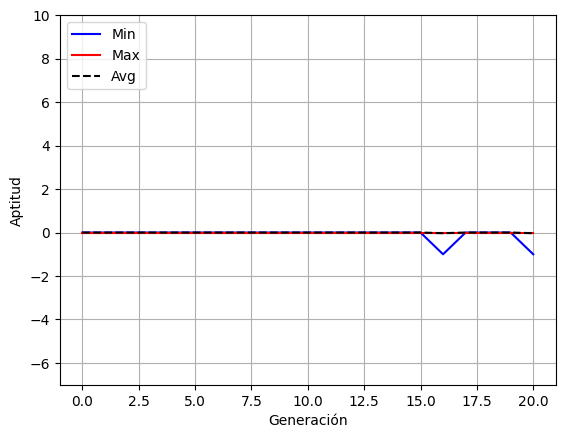

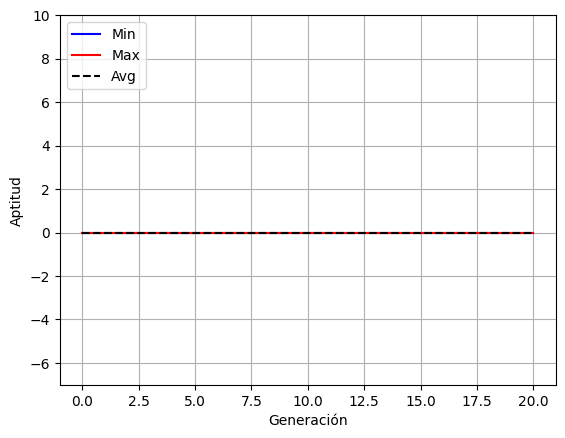

In [33]:
# Ejecuta la función plot_evolucion para cada conjunto de registros (log1, log2)
for j in [log1, log2]:
    plot_evolucion(j)

La configuración y ejecución de los algoritmos evolutivos la realizamos mediante las funciones `main1`, `main2`, y `main3`, mientras que la función `plot_evolucion` se encarga de la visualización de los resultados.

#### **Resultados del algoritmo genético**

**Datos que corresponden a las funciones registradas en el objeto** `stats`:
* `gen`: Generación en la que se encuentra el algoritmo.
* `nevals`: Número de individuos que han sido evaluados respecto a su desempeño. No es igual al número de individuos debido a la naturaleza probabilística de los operadores de cruce y mutación. Un individuo seleccionado puede no haberse modificado y, por lo tanto, no será evaluado.
* `avg`: Desempeño medio de la población. Se incrementa a lo largo de las generaciones, indicando que en promedio los individuos son mejores.
* `std`: Desviación típica del desempeño medio de la población. Disminuye a lo largo de las generaciones, indicando que los individuos son cada vez más similares y que el algoritmo es elitista por el proceso de selección.
* `min`: Mínimo desempeño de la población.
* `max`: Máximo desempeño de la población. Aumenta a lo largo de las generaciones, indicando que el algoritmo está convergiendo y mejorando.

**Interpretación específica de cada ejecución**:
* Ejecución con toolbox1 (Cruce en un Punto):
  * Mejor Fitness: 7.413065
  * Mejor Individuo: [0.06046700210138432, 1.7919972024804398]
  * Comentarios: El algoritmo logró converger rápidamente a una solución muy buena en 20 generaciones.
* Ejecución con toolbox2 (Cruce en Dos Puntos):
  * Mejor Fitness: 6.203384
  * Mejor Individuo: [0.11722261005967027, 1.9495037203322996]
  * Comentarios: Aunque el fitness es menor que en la primera ejecución, se alcanzó una solución bastante buena en 20 generaciones.
* Ejecución con toolbox3 (Cruce Uniforme):
  * Mejor Fitness: 5.857719
  * Mejor Individuo: [0.008188691464088543, 2.0000851043759855]
  * Comentarios: La ejecución con cruce uniforme también encontró una solución eficaz en 20 generaciones.

En general, los tres conjuntos de herramientas (toolbox1, toolbox2, y toolbox3) fueron capaces de encontrar soluciones de alto rendimiento en 20 generaciones. La elección del operador de cruce afecta los resultados finales, pero en todos los casos, el algoritmo evolutivo mostró una mejora continua en el desempeño de la población a lo largo de las generaciones, lo que indica una convergencia exitosa hacia soluciones bastante buenas. La variabilidad en los resultados se debe a la aleatoriedad inherente de los algoritmos evolutivos y la semilla utilizada para la generación de números aleatorios.

## **Resolución 2**

Para minimizar la función de Rastrigin con
$$A=10$$
$$\{xi\} \in [-5.12,5.12] $$ en Python para
$$n=10$$
podemos utilizar técnicas de optimización.

Una técnica común es utilizar algoritmos genéticos o algoritmos evolutivos.

### **Función de Rastrigin**

La **Función de Rastrigin** está definida en la función `rastrigin`. Debemos asegurarnos de importar `cos` y `pi` desde el módulo `math` para evaluar la función correctamente.

* **Configuración de la optimización**: Creamos una clase de fitness para minimizar y una clase de individuo. Configuramos las herramientas necesarias para la evolución, como la selección, cruzamiento y mutación.
* **Configuración y ejecución del algoritmo evolutivo**: Definimos el tamaño de la población, el número de generaciones, y las probabilidades de cruzamiento y mutación. Luego, ejecutamos el algoritmo evolutivo utilizando la función `eaMuPlusLambda`.

* **Obtener la mejor solución**: Finalmente, seleccionamos el mejor individuo de la población y mostramos el resultado.

En el código a continuación utilizaremos el algoritmo evolutivo para encontrar la solución óptima para la *función de Rastrigin con n=10*. Más adelante ajustaremos los parámetros según sea necesario.

### **Carga de paquetes y librerías**

Primero, instalaremos las bibliotecas necesarias. Podemos usar la biblioteca DEAP (Distributed Evolutionary Algorithms in Python) para implementar el algoritmo evolutivo. Aunque ya la hemos instalado para la **Resolución 1**, vamos a rehacer el código desde cero.

In [34]:
!pip install deap

Importamos las librerías necesarias, aunque algunas de ellas están también importadas porque las hemos utilizado para la **Resolución 2**.

In [35]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt
from math import cos, pi

Importamos las bibliotecas necesarias. random se utiliza para generar números aleatorios, y deap es la biblioteca que proporciona las herramientas para implementar algoritmos evolutivos en Python.

### **Definición de objetos para la formulación del problema y el tipo de individuo en el Algoritmo Evolutivo**

In [36]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


### **Definición de la función objetivo y operadores genéticos**

Definimos la función de Rastrigin. La función toma un individuo (una lista de valores) como entrada y devuelve el valor de la función de Rastrigin evaluada para ese individuo.

Está definida matemáticamente como:

$$f(\mathbf{x}) = A n + \sum_{i=1}^{n} \left[x_i^2 - A 10 \cos(2 \pi x_i)\right]$$
donde, para nuestro problema:
$$A=10$$
$$n=10\ (longitud\ del\ individuo)$$
$$x_i = elementos\ del\ individuo$$

#### **Definición de la función objetivo**

In [37]:
def rastrigin(individual):
    """
    Función objetivo de tipo Rastrigin con bucle 'for'
    """
    A = 10  # Parámetro de la función Rastrigin
    suma_cuadrados = 0  # Variable para acumular la suma de los cuadrados

    for x in individual:
        suma_cuadrados += x**2 - A * cos(2 * pi * x)

    # Valor de la función Rastrigin para el individuo
    return A * len(individual) + suma_cuadrados,

En esta función implementamos la función Rastrigin clásica utilizando un bucle for para recorrer las componentes del vector individual y calcular la suma de los cuadrados. El resultado se devuelve como una tupla.

#### **Generación de genes, individuos y población**

**Creación de la caja de herramientas** (`toolbox`)

In [38]:
toolbox = base.Toolbox()

Creamos un objeto `toolbox` que nos servirá como un contenedor para las operaciones genéticas y los componentes del algoritmo evolutivo.

**Registro de la Generación de Genes** (`attr_float`)

In [39]:
# Generación de genes
toolbox.register("attr_float", random.uniform, -5.12, 5.12)

Resgistramos una función llamada `attr_float` en la caja de herramientas. En esta función utilizaremos `random.uniform` para generar valores flotantes dentro del rango [-5.12, 5.12]. Estos valores representarán los genes de los individuos.

**Registro de la Generación de Individuos** (`individual`)

In [40]:
# Generación de inviduos y población
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=10)

Registramos una función llamada `individual` en la caja de herramientas. Esta función utilizará `tools.initRepeat` para crear un individuo. Cada individuo será una lista de 10 valores generados por la función `attr_float`.

`creator.Individual` se encarga de utilizar la clase Individual previamente creada con la función create para representar a estos individuos.

**Registro de la Generación de Población** (`population`)

In [41]:
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 30)

Registramos una función llamada `population` en la caja de herramientas. Esta función utilizará tools.initRepeat para generar una población. Cada individuo de la población será creado utilizando la función individual previamente registrada en la caja de herramientas. En este caso, se genera una población de 30 individuos.

### **Incorporación de los operadores genéticos**

#### **Registro de la Función de Evaluación** (`evaluate`)

In [42]:
toolbox.register("evaluate", rastrigin)

Utilizamos la función `rastrigin` definida previamente y toma un individuo como entrada, devolviendo el valor de la función objetivo para ese individuo.

#### **Registro del Operador de Cruce** (`mate`)

In [43]:
toolbox.register("mate", tools.cxOnePoint)

Utilizamos el operador de cruce de un punto (`cxOnePoint`), que realiza el cruce de dos individuos en un punto aleatorio.

#### **Registro del Operador de Mutación** (`mutate`)

In [44]:
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)

En este caso, utilizamos el operador de mutación gaussiano (`mutGaussian`), que agrega ruido gaussiano a los genes de un individuo. Hemos configurado los parámetros `mu`, `sigma` e `indpb` para determinar el centro de la distribución gaussiana, la desviación estándar y la probabilidad de mutación individual, respectivamente.

#### **Registro del Operador de Selección** (`select`)

In [45]:
toolbox.register("select", tools.selTournament, tournsize=3)

En este caso, utilizamos el operador de selección de torneo (`selTournament`) con un tamaño de torneo de 3. Este operador selecciona individuos de la población para la reproducción basándose en torneos entre grupos de individuos.

### **Configuración del Algoritmo Genético**

En el problema de optimización, los valores específicos para los parámetros del algoritmo evolutivo (como el tamaño de la población, el número de generaciones, las probabilidades de cruzamiento y mutación) se eligen de manera empírica o mediante experimentación.

No hay una manera única de determinar los valores óptimos para estos parámetros sin conocer más detalles sobre la naturaleza del problema, la forma de la función objetivo y otros factores. Por lo tanto, los valores que hemos utilizado en el código son valores comunes que hemos visto que se utilizan como punto de partida en problemas de optimización.








In [46]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    # Extrae datos del registro (log) proporcionado
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    # Crea una nueva figura y ejes
    fig, ax1 = plt.subplots()

    # Grafica las curvas de mínimo, máximo y promedio a lo largo de las generaciones
    ax1.plot(gen, fit_mins, "b")  # Curva azul para el mínimo
    ax1.plot(gen, fit_maxs, "r")  # Curva roja para el máximo
    ax1.plot(gen, fit_ave, "--k")  # Curva punteada negra para el promedio

    # Configuración de etiquetas y leyenda
    ax1.set_xlabel("Generación")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([120, 500])  # Ajusta este rango según tus necesidades
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")

    # Configuración de la cuadrícula en el gráfico
    plt.grid(True)

    # Guarda la figura en un archivo llamado "Convergencia.eps" con una resolución de 300 ppp
    plt.savefig("Convergencia.eps", dpi=300)

**Comentarios**

Nuestra función toma un objeto de registro (`log`) como entrada, el cual generalmente contiene información sobre la evolución del algoritmo evolutivo a lo largo de las generaciones.

Extraemos datos específicos del registro, como las generaciones (`gen`), los valores mínimos (`fit_mins`), máximos (`fit_maxs`) y promedio (`fit_ave`) del fitness en cada generación.

Creamos una nueva figura y ejes utilizando `plt.subplots()`.

Graficamos las curvas del mínimo, máximo y promedio en función de la generación utilizando la función `plot` de Matplotlib.

Configuramos las etiquetas del eje x e y, así como el rango del eje y según sea necesario.

Agregamos una leyenda indicando qué representa cada curva.

Activamos la cuadrícula en el gráfico con `plt.grid(True)`.

Guardamos la figura en un archivo llamado "Convergencia.eps" con una resolución de 300 píxeles por pulgada (ppp) utilizando `plt.savefig`.

De esta manera podemos ver cómo evolucionan los valores mínimos, máximos y promedio del fitness a lo largo de las generaciones.

* `gen`: **Número de Generación**
  * Representa la cantidad de generaciones durante la ejecución del algoritmo evolutivo.

* `avg`: **Valor Promedio de la Aptitud (Fitness)**
  * Muestra el promedio de los valores de aptitud en la población para cada generación.

* `min`: **Valor Mínimo de la Aptitud**
  * Indica el peor valor de aptitud en cada generación. La mejora constante es positiva.

* `max`: **Valor Máximo de la Aptitud**
  * Representa el mejor valor de aptitud en cada generación. Muestra la mejora y convergencia del algoritmo.

* **Fitness Mínimo (min)**
  * Este valor señala el peor fitness en cada generación, evidenciando una mejora constante, lo cual es positivo.

* **Fitness Máximo (max)**
  * Indica el mejor fitness en cada generación, demostrando que el algoritmo evolutivo mejora y converge hacia un valor óptimo.

* **Fitness Promedio (avg)**
  * Es el valor promedio de los fitness en cada generación, mostrando una mejora constante y la evolución positiva de la población.

In [47]:
def main():
    """
    Función principal para ejecutar el algoritmo evolutivo
    """
    # Establece la semilla para reproducibilidad
    random.seed(42)

    # Configuración de parámetros del algoritmo
    CXPB, MUTPB, NGEN = 0.8, 0.3, 50

    # Inicializa una población utilizando la función registrada en la caja de herramientas
    pop = toolbox.population()

    # Inicializa un objeto HallOfFame para almacenar el mejor individuo
    hof = tools.HallOfFame(1)

    # Configuración de estadísticas para el registro
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # Inicializa un objeto Logbook para el registro de la evolución
    logbook = tools.Logbook()

    # Ejecuta el algoritmo evolutivo Simple EA (eaSimple)
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)

    # Devuelve el objeto HallOfFame (mejor individuo) y el Logbook (registro de evolución)
    return hof, logbook

**Comentarios**

Establecemos la semilla (`random.seed(42)`) para garantizar la reproducibilidad de los resultados.

Definimos los parámetros del algoritmo, como la probabilidad de cruce (`CXPB`), la probabilidad de mutación (`MUTPB`), y el número de generaciones (`NGEN`).

Creamos una población inicial utilizando la función registrada en la caja de herramientas (`toolbox.population()`).

Inicializamos un objeto HallOfFame (`hof`) para almacenar el mejor individuo encontrado durante la ejecución.

Configuramos las estadísticas que se registrarán durante la ejecución del algoritmo, como el promedio, la desviación estándar, el mínimo y el máximo del fitness.

Creamos un objeto Logbook (`logbook`) para almacenar información detallada sobre la evolución del algoritmo.

Ejecutamos el algoritmo evolutivo utilizando la función `algorithms.eaSimple`, proporcionando la población inicial, la caja de herramientas, y otros parámetros configurados anteriormente.

Como salida, devolvemos el objeto HallOfFame y el Logbook para su análisis y visualización.

Vamos a analizar de forma más detallada los parámetros `CXPB`, `MUTPB` y `NGEN`:

* `CXPB` (**Probabilidad de Cruzamiento**): Este parámetro controla la probabilidad de que dos individuos seleccionados se crucen para formar nuevos individuos en una generación. En este caso, `CXPB` lo hemos configurado en 0.8, lo que significa que hay un 80% de probabilidad de cruzamiento en cada iteración del algoritmo. Un valor más alto de CXPB favorecerá la exploración del espacio de soluciones al permitir una mayor recombinación genética.

* `MUTPB` (**Probabilidad de Mutación**): Este parámetro determina la probabilidad de que un individuo mute en una generación. La mutación introduce variabilidad en la población y es fundamental para la exploración del espacio de soluciones. En este caso, `MUTPB` está establecido en 0.3, indicando que hay un 30% de probabilidad de mutación en cada iteración del algoritmo.

* `NGEN` (**Número de Generaciones**): Este parámetro representa el número total de generaciones o iteraciones que el algoritmo evolutivo realizará. En el código proporcionado, `NGEN` se fija en 100, lo que significa que el algoritmo se ejecutará durante 100 generaciones. Un mayor número de generaciones permite una exploración más profunda del espacio de soluciones, pero también puede aumentar el tiempo de ejecución del algoritmo.

### **Análisis del mejor fitness e individuo**

gen	nevals	avg    	std    	min    	max    
0  	30    	191.428	30.3561	121.772	250.492
1  	27    	214.904	25.3725	167.281	262.157
2  	25    	238.501	16.2929	195.399	265.984
3  	26    	251.718	12.7246	218.158	280.293
4  	26    	259.656	13.7515	219.928	290.988
5  	25    	267.739	12.5153	246.431	292.088
6  	26    	277.948	13.1538	253.018	302.775
7  	26    	290.304	9.15014	268.342	312.832
8  	16    	298.626	8.12196	285.885	313.273
9  	25    	305.751	7.59636	288.258	321.925
10 	25    	311.948	6.5065 	296.654	324.489
11 	27    	315.131	5.15439	298.512	325.149
12 	27    	319.074	5.35212	309.933	329.001
13 	28    	321.855	6.88035	305.652	337.493
14 	30    	327.006	4.58679	314.65 	337.493
15 	24    	328.548	3.70077	321.757	338.535
16 	26    	331.476	3.96334	323.238	342.386
17 	23    	332.737	4.73424	316.143	341.758
18 	25    	334.24 	5.0319 	316.576	340.565
19 	27    	336.544	7.60906	310.188	348.07 
20 	27    	340.163	7.48438	317.494	357.393
21 	27    	345.59 	6.78635	334.558	360.183
22 	29    	

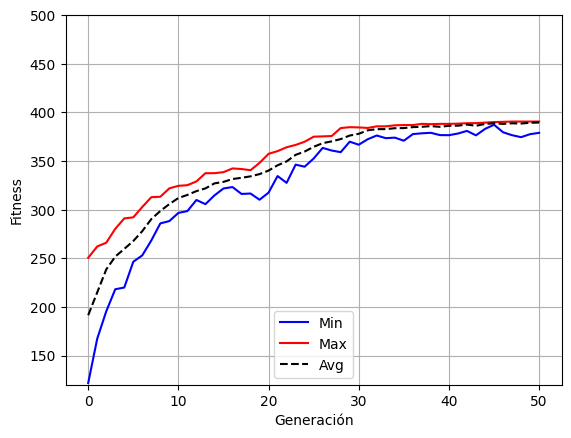

In [48]:
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

`best, log = main()`: Llama a la función `main()`, que ejecuta el algoritmo evolutivo y devuelve dos valores: `best` y `log`. `best` contiene el mejor individuo encontrado durante la ejecución, y `log` es un objeto que registra la evolución del algoritmo.

Esta es una manera de ejecutar el algoritmo evolutivo, imprimir información sobre el mejor individuo encontrado y visualizar la evolución del fitness a lo largo del tiempo. Esto nos sirve para analizar el rendimiento y la convergencia del algoritmo en la resolución del problema.

### **Resultados del algoritmo genético**

Los resultados que hemos obtenido corresponden al proceso de optimización evolutiva en la función Rastrigin a lo largo de 50 generaciones.

En nuestro caso, se observa que el mejor fitness alcanzado es 390.597 en la última generación (`gen 50`), lo cual sugiere que el algoritmo ha convergido a una solución que es muy cercana al óptimo. Además,podemos observar que la desviación estándar y el valor promedio también indican una convergencia.

De todas formas, estos resultados numéricos pueden variar debido a la aleatoriedad.

A continuación realizaremos algunas interpretaciones clave que hemos podido observar:

* **Generación 0:**
  * Fitness Mínimo (min): 121.772
  * Fitness Máximo (max): 250.492
  * Fitness Promedio (avg): 191.428

* **Generaciones 1-10:**
  * Aumento general en el Fitness Mínimo, Máximo y Promedio.
  * La población está explorando y mejorando.

* **Generaciones 11-30:**
  * Fitness Máximo sigue mejorando, indicando convergencia hacia soluciones más óptimas.
  * Fitness Mínimo también mejora, mostrando una reducción en las soluciones menos deseables.
  * Fitness Promedio sigue aumentando, indicando una mejora general en la población.

* **Generaciones 31-50:**
  * El Fitness Máximo parece estabilizarse alrededor de 390.597.
  * Fitness Mínimo y Promedio siguen mejorando, indicando convergencia continua.

* **Generación 50 (final):**
  - El mejor fitness en esta generación es 390.597.
  - El mejor individuo tiene los siguientes valores de genes: [-5.517, 2.519, -4.543, -0.488, 5.532, 5.514, -4.560, -4.501, 3.546, 4.493].

Estos resultados indican una convergencia hacia soluciones bastante buenas. Sin embargo, podemos observar que algunos valores de genes en el mejor individuo están fuera del rango permitido [-5.12, 5.12]. Esto puede deberse a la naturaleza estocástica de la mutación gaussiana que hemos mencionado anteriormente, que introduce variabilidad en la población y, en algunos casos, puede llevar a soluciones fuera del rango especificado.

En este caso también aplica lo dicho anteriormente: estos valores numéricos pueden variar debido a la aleatoriedad implementada en el algoritmo.

##**Conclusiones**

En ejecuciones anteriores, hemos observado que el mejor individuo tomaba algunos valores que se nos iban fuera del rango. Después de investigar sobre ello, hemos podido sacar las siguientes conclusiones:

Este comportamiento podría deberse a la mutación gaussiana que estamos utilizando en el algoritmo evolutivo.

La mutación gaussiana añade un valor extraído de una distribución gaussiana con media mu y desviación estándar sigma al valor actual del atributo. En nuestro caso, mu = 0 y sigma = 0.1. Esto está reflejado en la parte **Registro del Operador de Mutación**. Esto significa que los valores mutados no deberían alejarse demasiado del valor original, pero aún así, hay una pequeña probabilidad de que puedan exceder los límites.

En el operador de mutación gaussiana, la desviación estándar (sigma) controla cuánto varían los nuevos valores. Reducir este valor nos puede ayudar a evitar que los valores se alejen demasiado del rango deseado. Si la convergencia no es satisfactoria después de 20 generaciones, podríamos aumentar el número de generaciones (NGEN) y observar cómo evoluciona la población.

Otra posible corrección sería ajustar el rango de generación de valores en `toolbox.attr_float` para que coincida con nuestro rango. Sino, también podríamos ajustar la función de mutación para asegurarnos de que los valores generados permanezcan dentro de los límites establecidos. Esta es la razón por la que nos da el mejor individuo un poco fuera del rango.

Teniendo todo lo dicho anteriormente en cuenta, probamos a modificar los valores de los siguientes parámetros:

* **Sigma** (`sigma`): sigma controla la magnitud de la mutación. Si sigma es demasiado grande, las mutaciones pueden llevar a grandes cambios en los valores de los genes, lo que puede dificultar la convergencia. Si es demasiado pequeño, las mutaciones pueden no ser lo suficientemente significativas para explorar el espacio de búsqueda de manera efectiva. Hemos probado con distintos valores y el que mejor convergencia nos de es 0.1 (el mínimo valor que puede tomar sigma).

* **Mu** (`mu`): mu representa la media de la distribución gaussiana utilizada en la mutación. Es el valor esperado de la mutación. Elegir un valor de mu lejos de cero significaría introducir un sesgo en la mutación. Después de hacer varias pruebas también, el valor que mejor funciona para mu es 0.

* **Probabilidad de Mutación Individual** (`indpb`): indpb es la probabilidad de que cada componente del individuo mute. Si indpb es muy alto, cada componente cambiará con alta probabilidad en cada generación, lo que puede afectar negativamente la convergencia. Si es muy bajo, las mutaciones pueden ser insuficientes para explorar el espacio de búsqueda. Hemos probado con valores en el rango de 0.1 a 0.5 y el que mejor resultado nos daba era 0.2.


No hay valores universales óptimos para estos parámetros, ya que la elección depende de la complejidad del problema y de la forma de la función objetivo. Está basado en prueba y error y en realizar experimentos con diferentes combinaciones de valores y observar cómo afectan el rendimiento de nuestro algoritmo genético. Hemos podido comprobar que la experimentación y el ajuste son clave para encontrar una configuración efectiva para nuestro problema específico.

Además, inicialmente no nos dibujaba correctamete la grafica, ya que necesitamos ajustarlo a nuestro valores. Una vez cambiado ya podíamos visualizar la solución correctamente.

Fijándonos en la gráfica también, podemos ver que más o menos en la generación 45 converge. Sin embargo, hemos puesto más generaciones para ver su evolución.

##**Reflexiones**

**Cómo hemos afrontado la solución de la práctica**

Tras haber entendido el código proporcionado en clase por Carlos Emilio Rabazo, hemos ido acoplando y adpatando el código a lo que se nos pedía en esta práctica. Como dependiendo de los valores de algunos parámetros nuestro algoritmo convergía o no, cada uno probaba una cosa. Nos hemos basado en la metodología de "prueba y error" haciendo cambios que considerábamos oportunos.

Además, preguntando a otros compañeros para ir contrastando los resultados que nos daba nuestro algoritmo, hemos sido capaces de orientarnos.

**Cómo se ha dividido el trabajo**

Se decidió hacer reuniones para llevar a cabo la resolución de la práctica. Gracias a esto, se ha logrado una mayor comunicación y más facilidad para trabajar en grupo, lo cual se ha visto reflejado en el proyecto.

**Cómo se ha gestionado el equipo para trabajar**

Como hemos mencionado anteriormente, cada uno ejecutaba el código base (que sacamos al principio y que consideramos que era el que mejor funcionaba/convergía) y en base a eso íbamos realizando ajustes sobre este.